

### Import Libraries

In [70]:
import numpy as np
import pandas as pd

### Load Dataset

In [71]:
###Load data here###
data= pd.read_csv("odd.csv")

### Visualize Data

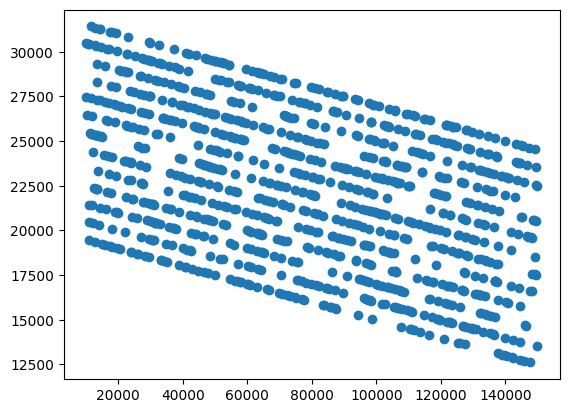

In [72]:
##Run this cell to visualize the data###
import matplotlib.pyplot as plt

plt.scatter(x=data.Mileage.values, y=data.Price.values)
plt.show()

### Check for Missing Values

In [73]:
###Check for Missing Data###
data.isnull().sum()

Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

In [74]:
data.dtypes

Year           int64
Mileage        int64
Condition     object
Price        float64
dtype: object

### Perform Minmax Scaling

In [75]:
def minmax_scaling (data, column):
    min = data[column].min()
    max = data[column].max()
    return (data[column] - min) / (max - min)

In [76]:
###Apply above function on appropriate columns###
data['Mileage'] = minmax_scaling(data, 'Mileage')
data['Price'] = minmax_scaling(data, 'Price')
data['Year'] = minmax_scaling(data, 'Year')
data

,Year,Mileage,Condition,Price
0,1.000000,0.057460,Excellent,0.344739
1,0.333333,0.025044,Excellent,0.782267
2,0.500000,0.257488,Good,0.589531
3,1.000000,0.178234,Excellent,0.299866
4,0.750000,0.382822,Excellent,0.383411
...,...,...,...,...
995,0.000000,0.994546,Excellent,0.634803
996,0.333333,0.075361,Excellent,0.763577
997,0.500000,0.714111,Good,0.419880
998,0.000000,0.011631,Good,1.000000


In [77]:
#One-Hot Encoding
data=pd.get_dummies(data,columns=["Condition"],dtype=int,drop_first=True)
data

,Year,Mileage,Price,Condition_Fair,Condition_Good
0,1.000000,0.057460,0.344739,0,0
1,0.333333,0.025044,0.782267,0,0
2,0.500000,0.257488,0.589531,0,1
3,1.000000,0.178234,0.299866,0,0
4,0.750000,0.382822,0.383411,0,0
...,...,...,...,...,...
995,0.000000,0.994546,0.634803,0,0
996,0.333333,0.075361,0.763577,0,0
997,0.500000,0.714111,0.419880,0,1
998,0.000000,0.011631,1.000000,0,1


### Divide Data into Training and Testing

In [78]:
def train_test_split (data, ratio):
    indices = np.random.permutation(data.shape[0])
    test_set_size = int(data.shape[0] * ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [79]:
###Understand the above function and divide data into X_train, X_test, y_train, y_test###
train_data, test_data = train_test_split(data, 0.3) # 70% train , 30% test

### Calculate Weights Using the Normal Equation Method (Matrix Algebra)

In [80]:
###Use the np.linalg.inv function to compute the weight vector/array theta (Hint: @ operator in numpy)###
###You will be required to extract numpy arrays from the DataFrame (Hint: column_name.values)###
###Also, you need to reshape the arrays and merge them to create a multi-dimensional
###array in numpy, similar to a Pandas DataFrame (Hint: np.hstack)
###A bias vector/column is also required as a column in our stacked array (Hint: np.ones)###
X_train = train_data[['Year','Mileage','Condition_Fair','Condition_Good']].values
y_train = train_data[['Price']].values.reshape(-1, 1)
X_test = test_data[['Year','Mileage','Condition_Fair','Condition_Good']].values
y_test = test_data[['Price']].values.reshape(-1, 1)

X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train



### Calculate Predictions on Test Set

In [81]:
###Calculate predictions on X_test using theta###
y_pred = X_test @ theta
print(y_pred)


[[ 5.16402409e-01]
 [ 5.53970451e-01]
 [ 5.14905224e-01]
 [ 8.09806346e-01]
 [ 5.99426253e-01]
 [ 5.50178215e-01]
 [ 5.37139560e-01]
 [ 8.33626715e-01]
 [ 1.88068536e-01]
 [ 5.35852589e-01]
 [ 1.94219514e-01]
 [ 7.29083130e-01]
 [ 1.92765264e-01]
 [ 9.05328283e-01]
 [ 3.33333537e-01]
 [ 7.67033653e-01]
 [ 1.90188266e-01]
 [ 1.70979825e-01]
 [ 2.37947721e-01]
 [ 4.24087597e-01]
 [ 9.83952391e-02]
 [ 8.93381227e-01]
 [ 8.03141731e-01]
 [ 8.99207834e-01]
 [ 5.66911593e-01]
 [ 7.96728000e-01]
 [ 4.75061204e-01]
 [ 4.71236729e-01]
 [ 3.47712156e-01]
 [ 5.25010785e-01]
 [ 9.99996908e-01]
 [ 6.45181586e-01]
 [ 3.70991798e-01]
 [ 7.56061479e-01]
 [ 9.04509542e-01]
 [ 7.44637356e-01]
 [ 9.26102793e-01]
 [ 7.16315339e-01]
 [ 6.25659609e-01]
 [ 4.49273899e-01]
 [ 6.38845104e-01]
 [ 5.35514002e-02]
 [ 3.02767199e-01]
 [ 5.16029849e-01]
 [ 4.93748094e-01]
 [ 4.70354988e-01]
 [ 6.60976491e-01]
 [ 2.92856975e-01]
 [ 1.98169863e-01]
 [ 9.82927203e-01]
 [ 5.07818035e-01]
 [ 2.39582244e-01]
 [ 5.9672135

### Calculate MSE (Evaluate Model)

In [83]:
###Evaluate the regression model based on Mean Squared Error###
mse = np.mean((y_pred - y_test) ** 2)
print("MSE (Normal Equation):", mse)

MSE (Normal Equation): 1.0494178692537034e-11


### Inverse Transform Model's Output

In [84]:
###Transform model's output back to original range/scale###

price_min = data['Price'].min()
price_max = data['Price'].max()  

y_pred_original = y_pred * (price_max - price_min) + price_min
print("Inverse Transformed Predictions:", y_pred_original)

Inverse Transformed Predictions: [[ 5.16402409e-01]
 [ 5.53970451e-01]
 [ 5.14905224e-01]
 [ 8.09806346e-01]
 [ 5.99426253e-01]
 [ 5.50178215e-01]
 [ 5.37139560e-01]
 [ 8.33626715e-01]
 [ 1.88068536e-01]
 [ 5.35852589e-01]
 [ 1.94219514e-01]
 [ 7.29083130e-01]
 [ 1.92765264e-01]
 [ 9.05328283e-01]
 [ 3.33333537e-01]
 [ 7.67033653e-01]
 [ 1.90188266e-01]
 [ 1.70979825e-01]
 [ 2.37947721e-01]
 [ 4.24087597e-01]
 [ 9.83952391e-02]
 [ 8.93381227e-01]
 [ 8.03141731e-01]
 [ 8.99207834e-01]
 [ 5.66911593e-01]
 [ 7.96728000e-01]
 [ 4.75061204e-01]
 [ 4.71236729e-01]
 [ 3.47712156e-01]
 [ 5.25010785e-01]
 [ 9.99996908e-01]
 [ 6.45181586e-01]
 [ 3.70991798e-01]
 [ 7.56061479e-01]
 [ 9.04509542e-01]
 [ 7.44637356e-01]
 [ 9.26102793e-01]
 [ 7.16315339e-01]
 [ 6.25659609e-01]
 [ 4.49273899e-01]
 [ 6.38845104e-01]
 [ 5.35514002e-02]
 [ 3.02767199e-01]
 [ 5.16029849e-01]
 [ 4.93748094e-01]
 [ 4.70354988e-01]
 [ 6.60976491e-01]
 [ 2.92856975e-01]
 [ 1.98169863e-01]
 [ 9.82927203e-01]
 [ 5.07818035e-01

### Calcualte Weights Using Gradient Descent

In [85]:
###Implement Batch GD to compute the weight vector theta###

theta0, theta1, theta2, theta3,theta4  = 0, 0, 0, 0, 0
alpha = 0.01
epochs = 100


for i in range(epochs):
    ###Implement GD###
    x1 = X_train[:, 1]  # Only 'Mileage' column
    x2 = X_train[:, 3]  # only  fair
    x3 = X_train[:, 4]  # for  good 
    x4 = X_train[:, 0]  # for  year
    y_pred = theta0 + theta1 * x1 + theta2 * x2 + theta3 * x3 + theta4 * x4
    error = y_pred.reshape(-1, 1) - y_train

    grad0 = (1 / len(X_train)) * np.sum(error)
    grad1 = (1 / len(X_train)) * np.sum(error.flatten() * x1) #error is 2d and x1 is 1d
    grad2 = (1 / len(X_train)) * np.sum(error.flatten() * x2)
    grad3 = (1 / len(X_train)) * np.sum(error.flatten() * x3)
    grad4 = (1 / len(X_train)) * np.sum(error.flatten() * x4)

    theta0 -= alpha * grad0
    theta1 -= alpha * grad1
    theta2 -= alpha * grad2
    theta3 -= alpha * grad3
    theta4 -= alpha * grad4

theta_gd = np.vstack((theta0, theta1,theta2,theta3,theta4))
print(theta_gd)

[[0.207528  ]
 [0.03650284]
 [0.0252609 ]
 [0.05269891]
 [0.207528  ]]


### Calculate Predictions on Test Test

In [86]:
###Calculate y_pred on weights from GD###
y_pred_gd = X_test @ theta_gd


### Calculate MSE (Evaluate Model)

In [87]:
###Calculate MSE on y_pred from GD###
mse_gd = np.mean((y_pred_gd - y_test) ** 2)
print("MSE (Gradient Descent):", mse_gd)

MSE (Gradient Descent): 0.10861082689494897


### Compare the two Approaches based on MSE ###

In [88]:
###Which approach is more accurate?###
###Which approach is fast###?
if mse < mse_gd:
    print("Normal Equation performed better (lower MSE).")
elif mse > mse_gd:
    print("Gradient Descent performed better (lower MSE).")
else:
    print(" Both approaches performed equally well.")

Normal Equation performed better (lower MSE).


### a user menu at the end to take input from user and output the model's prediction.

In [100]:
## a user menu 
year = int(input("Enter car's manufacturing year: "))
mileage = float(input("Enter car's mileage: "))
condition = input("Enter the car's condition (good,fair or excellent): ") 


if condition == 'fair': #one-hot encoded values
    condition_fair = 1
    condition_good = 0
elif condition == 'good':
    condition_fair = 0
    condition_good = 1
else:                    #if excellent
    condition_fair = 0
    condition_good = 0

x_input = np.array([[1, year, mileage, condition_fair, condition_good]])

prediction = x_input @ theta_gd

print(f"Estimated Car Price: ${prediction[0][0]:.2f}")

Estimated Car Price: $25019.85
